#Task- Predicting a Startups Profit/Success Rate using Multiple Linear Regression in Python-Download Data Set click here.
#Here 50 startups dataset containing 5 columns  like “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Profit”.

#In this dataset first 3 columns provides you spending on Research , Administration and Marketing respectively. State indicates startup based on that state. Profit indicates how much profits earned by a startup.

#Clearly, we can understand that it is a multiple linear regression problem, as the independent variables are more than one.

Prepare a prediction model for profit of 50_Startups data in Python

In [ ]:
# Multiple Linear Regression for 50 Startup
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/sample_data/50_Startups.csv')


In [ ]:
#X = dataset.iloc[:, :-1]
#y = dataset.iloc[:, 4]

In [ ]:
#print(X)
#print(y)

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset.sample(6)

,R&D Spend,Administration,Marketing Spend,State,Profit
15,114523.61,122616.84,261776.23,New York,129917.04
22,73994.56,122782.75,303319.26,Florida,110352.25
24,77044.01,99281.34,140574.81,New York,108552.04
5,131876.90,99814.71,362861.36,New York,156991.12
40,28754.33,118546.05,172795.67,California,78239.91
7,130298.13,145530.06,323876.68,Florida,155752.60


In [ ]:
#check how many null values are there in the dataset
dataset.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
#shape of the dataset
dataset.shape

(50, 5)

In [ ]:
dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [ ]:
dataset.size

250

In [ ]:
#descriptive analysis with describe function
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
print(dataset.mean())
print(dataset.std())

R&D Spend           73721.6156
Administration     121344.6396
Marketing Spend    211025.0978
Profit             112012.6392
dtype: float64
R&D Spend           45902.256482
Administration      28017.802755
Marketing Spend    122290.310726
Profit              40306.180338
dtype: float64


In [ ]:
#Basic info of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


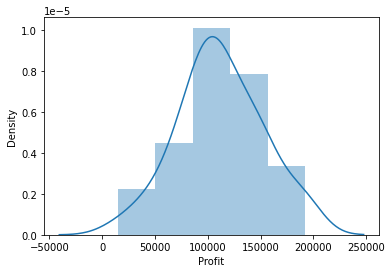

In [ ]:
sns.distplot(dataset['Profit'],bins=5,kde=True)

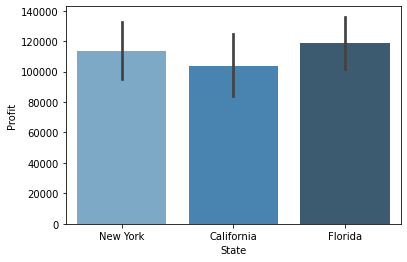

In [ ]:
sns.barplot(x='State',y='Profit',data=dataset,palette="Blues_d")

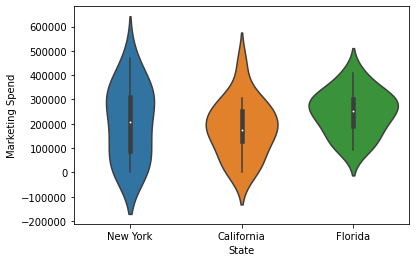

In [ ]:
sns.violinplot(x=dataset.State,y=dataset['Marketing Spend'])

In [ ]:
!pip install pingouin


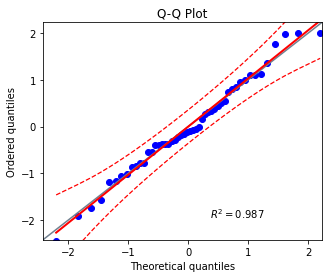

In [ ]:
from pingouin import qqplot
qqplot(dataset['Profit'],dist='norm')

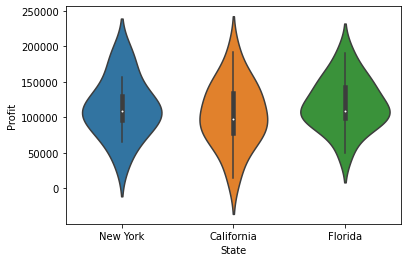

In [ ]:
sns.violinplot(x=dataset.State,y=dataset['Profit'])

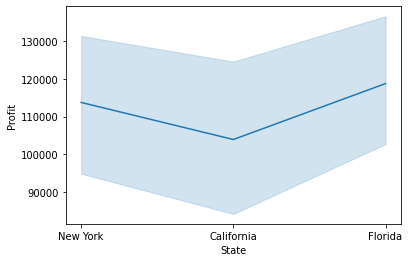

In [ ]:
sns.lineplot(x='State',y='Profit',data=dataset)

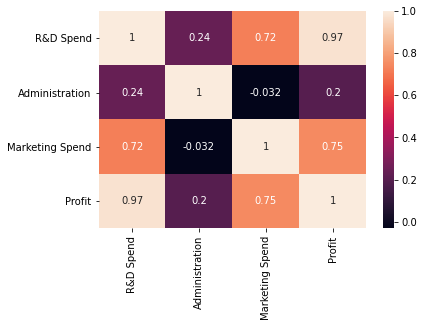

In [ ]:
#conclusion-Looks Florida has the maximum profit
sns.heatmap(dataset.corr(),annot=True)

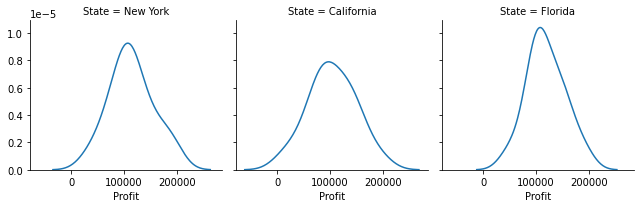

In [ ]:
loves=sns.FacetGrid(dataset,col='State')
loves=loves.map(sns.kdeplot,'Profit')

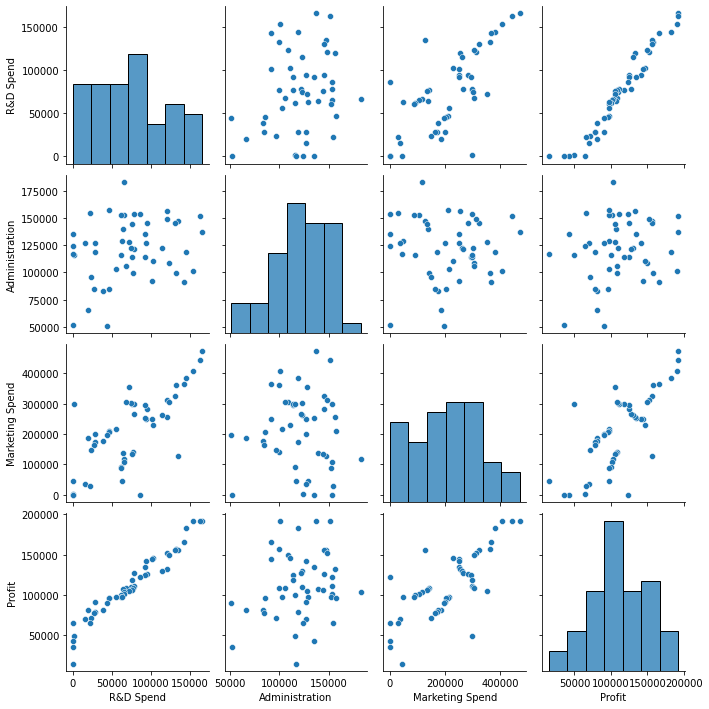

In [ ]:
sns.pairplot(dataset)

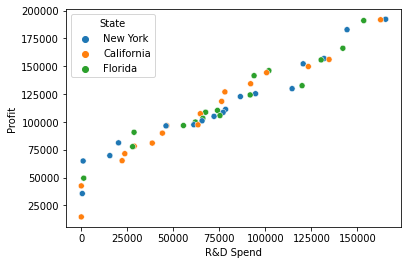

In [ ]:
sns.scatterplot(x='R&D Spend',y='Profit',hue='State',data=dataset)

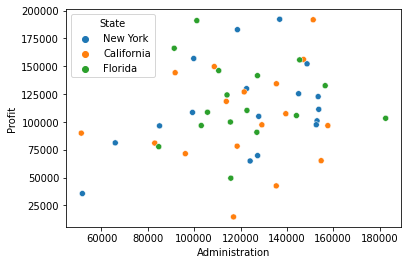

In [ ]:
sns.scatterplot(x='Administration',y='Profit',hue='State',data=dataset)

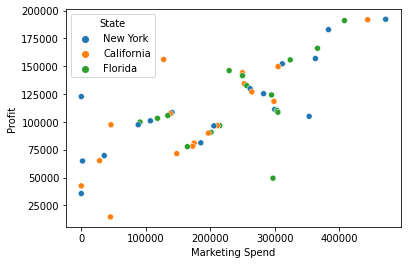

In [ ]:
sns.scatterplot(x='Marketing Spend',y='Profit',hue='State',data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


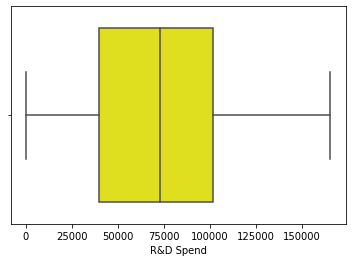

In [ ]:
sns.boxplot(dataset['R&D Spend'],color='yellow')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


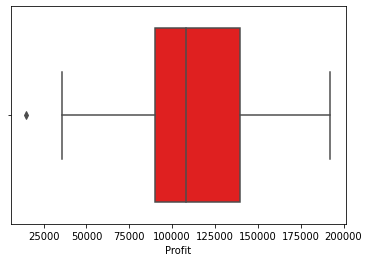

In [ ]:
sns.boxplot(dataset['Profit'],color='red')

In [ ]:
dataset.head(1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


#Correlation¶
#The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship (correlation) between various variables and make decisions accordingly.

#Correlation only works on the continuous variables and we have State variable which is a categorical variable. We need to convert the State variable into numerical values using Encoding techniques.

In [ ]:
dataset['State'].describe()

count             50
unique             3
top       California
freq              17
Name: State, dtype: object

#We have total 50 states count and only 3 unique states so we can go for One Hot Encoding technique. If we had more number of unique states count then we would have used another Encoding Technique called as Label Encoding.

In [ ]:
datasets = pd.get_dummies(dataset, columns=['State'])
datasets.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


#Now we can see that there are 3 more columns added for State

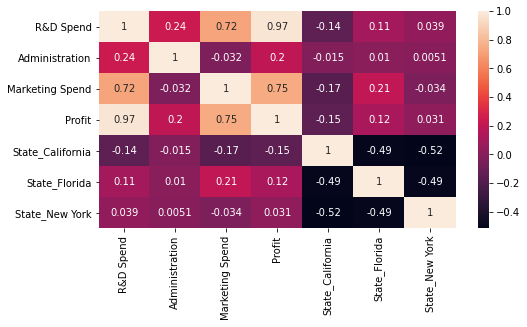

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(datasets.corr(),annot = True)

#Finding correlation

In [ ]:
datasets.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


#Observations :-¶
#There exist a positive correlation between R&D spend and Marketing Spend with value 0.7.
#There is a very high positive correlation with a value of 0.972 between Profit and R&D Spend as well.
#The correlation value for Administration and R&D Spend is 0.24 so we can say there is very low correlation between them.
#The correlation value for Administration and Marketing Spend is -0.03 so we can say there is negative correlation between them but it very low.
#The correlation values between the states California, Florida and New York and Profit is very less (almost 0)

In [ ]:
datasets.rename(columns={'Marketing Spend':'Marketing'},inplace=True)

In [ ]:
datasets.rename(columns={'R&D Spend':'RD'},inplace=True)

In [ ]:
datasets.rename(columns={'State_New York':'State_NewYork'},inplace=True)

In [ ]:
datasets.head()

,RD,Administration,Marketing,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


#We need to standardize our data as we have used One Hot encoding technique and changed State variable. The scale is very different for States and the other variables so we will use Standard Scaler technique for standardizing the other variable

In [ ]:
std = StandardScaler()
dataset_std = std.fit_transform(datasets)
dataset_std = pd.DataFrame(dataset_std, columns = datasets.columns)

In [ ]:
dataset_std.head()

,RD,Administration,Marketing,Profit,State_California,State_Florida,State_NewYork
0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741


#Fitting Linear Regression

In [ ]:
model = smf.ols('Profit~RD+Administration+Marketing+State_California+State_Florida+State_NewYork',data=dataset_std).fit()

In [ ]:
model.params

Intercept          -5.551115e-16
RD                  9.179307e-01
Administration     -1.877136e-02
Marketing           8.185781e-02
State_California   -6.031706e-04
State_Florida       1.730042e-03
State_NewYork      -1.100457e-03
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.34e-27
Time:                        17:17:00   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.551e-16      0.033  -1.66e-14      1.000      -0.067       0.067
RD                   0.9179      0.053     17.369      0.000       0.811       1.024
Administration      -0.0188      0.036     -0.517      0.608      -0.092       0.054
Marketing            0.0819      0.052      1.574      0.123      -0.023       0.187
State_California    -0.0006      0.023     -0.027      0.979      -0.046       0.045
State_Florida        0.0017      0.023      0.075      0.941      -0.045       0.048
State_NewYork       -0.0011      0.022     -0.049      0.961      -0.046       0.044
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.09e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.22e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept          -1.659260e-14
RD                  1.736858e+01
Administration     -5.170116e-01
Marketing           1.573889e+00
State_California   -2.676515e-02
State_Florida       7.490466e-02
State_NewYork      -4.931619e-02
dtype: float64 
 Intercept           1.000000e+00
RD                  2.578772e-21
Administration      6.077373e-01
Marketing           1.226769e-01
State_California    9.787681e-01
State_Florida       9.406301e-01
State_NewYork       9.608905e-01
dtype: float64


#R squared values

In [ ]:
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.34e-27
Time:                        17:19:07   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.551e-16      0.033  -1.66e-14      1.000      -0.067       0.067
RD                   0.9179      0.053     17.369      0.000       0.811       1.024
Administration      -0.0188      0.036     -0.517      0.608      -0.092       0.054
Marketing            0.0819      0.052      1.574      0.123      -0.023       0.187
State_California    -0.0006      0.023     -0.027      0.979      -0.046       0.045
State_Florida        0.0017      0.023      0.075      0.941      -0.045       0.048
State_NewYork       -0.0011      0.022     -0.049      0.961      -0.046       0.044
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.09e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.22e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#Simple Linear Regression between Profit and Administration

In [ ]:
model_ad = smf.ols('Profit~Administration',data=dataset_std).fit()

In [ ]:
model_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 17 Jul 2021   Prob (F-statistic):              0.162
Time:                        17:20:50   Log-Likelihood:                -69.919
No. Observations:                  50   AIC:                             143.8
Df Residuals:                      48   BIC:                             147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.274e-16      0.141  -3.73e-15      1.000      -0.284       0.284
Administration     0.2007      0.141      1.419      0.162      -0.084       0.485
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Simple Linear Regression between Profit and Marketing Spend

In [ ]:
model_mkt = smf.ols('Profit~Marketing',data=dataset_std).fit()

In [ ]:
model_mkt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           4.38e-10
Time:                        17:22:36   Log-Likelihood:                -50.470
No. Observations:                  50   AIC:                             104.9
Df Residuals:                      48   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.274e-16      0.096   -5.5e-15      1.000      -0.193       0.193
Marketing      0.7478      0.096      7.803      0.000       0.555       0.940
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Simple Linear Regression between Profit and R&D Spend

In [ ]:
model_rd = smf.ols('Profit~RD',data=dataset_std).fit()

In [ ]:
model_rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           3.50e-32
Time:                        17:23:46   Log-Likelihood:                 2.2714
No. Observations:                  50   AIC:                           -0.5428
Df Residuals:                      48   BIC:                             3.281
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.274e-16      0.033  -1.58e-14      1.000      -0.067       0.067
RD             0.9729      0.033     29.151      0.000       0.906       1.040
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

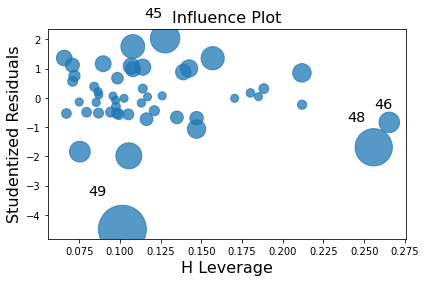

In [ ]:
fig = smf.graphics.influence_plot(model)
fig.tight_layout(pad=1.0)

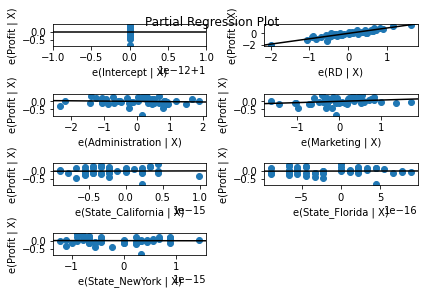

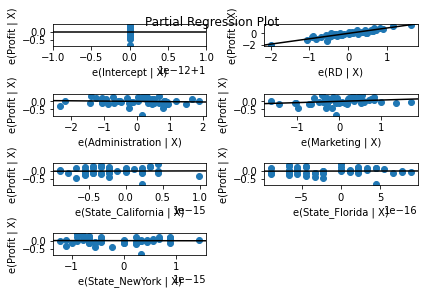

In [ ]:
smf.graphics.plot_partregress_grid(model)

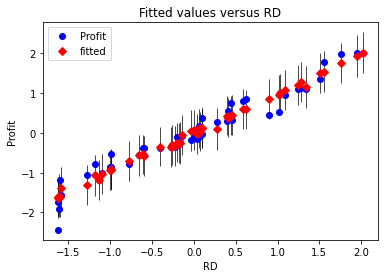

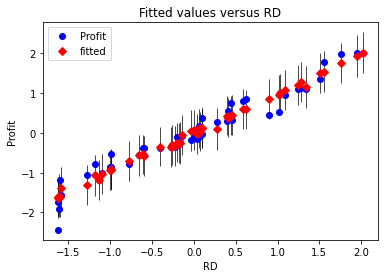

In [ ]:
smf.graphics.plot_fit(model,1)

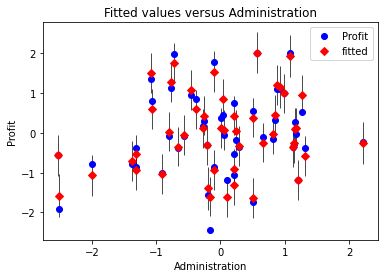

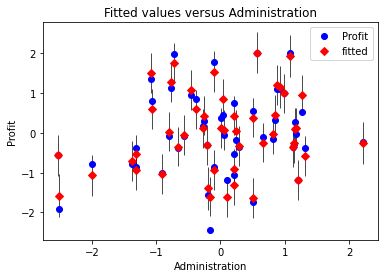

In [ ]:
smf.graphics.plot_fit(model,2)

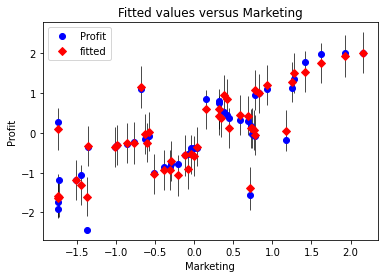

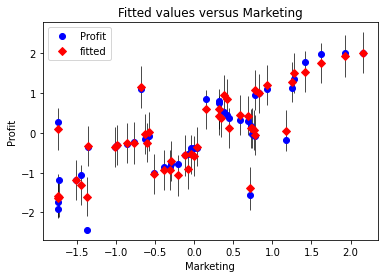

In [ ]:
smf.graphics.plot_fit(model,3)


In [ ]:
X=dataset[['R&D Spend','Administration','Marketing Spend']]
y=dataset['Profit']

In [ ]:
#fig=smf.graphics.plot_regress_exog(model,'Marketing Spend',fig =plt.figure(figsize=(12,10)))
#fig.tight_layout(pad=1.0)
#plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [ ]:
# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

44203.269464439494
[0.81361399 0.0132271  0.0340789 ]


In [ ]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
R&D Spend,0.813614
Administration,0.013227
Marketing Spend,0.034079


In [ ]:
#dataloves=pd.DataFrame(saurabh,y_test)


NameError: ignored

In [ ]:
# Predicting the Test set results
#y_pred = regressor.predict(X_test)
#from sklearn.metrics import r2_score
#score=r2_score(y_test,y_pred)